In [39]:
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
# read json file
with open("Meta-Llama-3.1-405B-Instruct_ slow_500 times.json", "r", encoding="utf-8") as file:
    data=json.load(file)

# extract "responses" from the file
responses=data["responses"] 

# 确保每个响应是字典而非字符串
parsed_responses=[]
for response in responses:
    if isinstance(response, str):  # if it is a string, then parse it into dictionary
        try:
            parsed_responses.append(json.loads(response))
        except json.JSONDecodeError:
            print("无法解析响应为JSON：", response) # catch errors by "try-excpet"
    elif isinstance(response, dict):  # for the situation that it has already been dictonary
        parsed_responses.append(response)

print(parsed_responses)


无法解析响应为JSON： **Sorted Options:**
1. e
2. a
3. d
4. b
5. c

**Reasoning:**
1. **Reasons for Selection Order:** The ranking is based on the probability of each statement being true given the information provided about Linda. Option e has the highest probability as it encompasses two possibilities (Linda being active in the feminist movement or working as a bank teller), making it more likely than the individual events. Option a is ranked second due to Linda's background in philosophy and her concern with social justice issues, which might align with feminist values. Option d is a subset of option a and is ranked third. Option b is ranked fourth as there is no information provided that would suggest Linda is working as a bank teller. Option c has the lowest probability as it requires both events (Linda being active in the feminist movement and working as a bank teller) to be true, making it the least likely.

2. **Reasoning Steps:** 
- Analyzed the given information about Linda's backgrou

In [51]:
# extract the option from responses
sorted_options = []
for response in responses:
    if "**Sorted Options:**" in response:
        sorted_part=response.split("**Sorted Options:**")[1].split("\n\n")[0].strip() # extract the content after "**Sorted Options:**" but before "\n\n"
        orders=[line.split(".")[1].strip() for line in sorted_part.split("\n")] # extract options
        sorted_options.append(orders)

# Create a counter at each ordinal position and count the number of times the option appears in each position
orders_counts= {order: Counter() for order in range(1, 6)}
for orders in sorted_options:
    for i, option in enumerate(orders, 1):
        orders_counts[i][option]+=1
orders_counts

{1: Counter({'e': 500}),
 2: Counter({'a': 500}),
 3: Counter({'d': 500}),
 4: Counter({'b': 500}),
 5: Counter({'c': 500})}

In [53]:
# create a dataframe
orders_data = {f"Order {order}": dict(counts) for order, counts in orders_counts.items()}
df = pd.DataFrame(orders_data).fillna(0)

df1= df.T # tranpose the row and column

In [55]:
#caculate the conjunction and disjunction error
conjunction_fallacy_count= 0  
disjunction_fallacy_count= 0         
total_responses= len(sorted_options)

for orders in sorted_options:
    if orders.index('c') < orders.index('b'):
        conjunction_fallacy_count +=1

    if orders.index('a') < orders.index('e'):
        disjunction_fallacy_count +=1


conjunction_fallacy_prob= "%.2f%%"%((conjunction_fallacy_count / total_responses)*100)
disjunction_fallacy_prob= "%.2f%%"%((disjunction_fallacy_count / total_responses)*100)


print("The probability of conjunction fallacy is:",conjunction_fallacy_prob)
print("The probability of disjunction fallacy is:",disjunction_fallacy_prob)

The probability of conjunction fallacy is: 0.00%
The probability of disjunction fallacy is: 0.00%


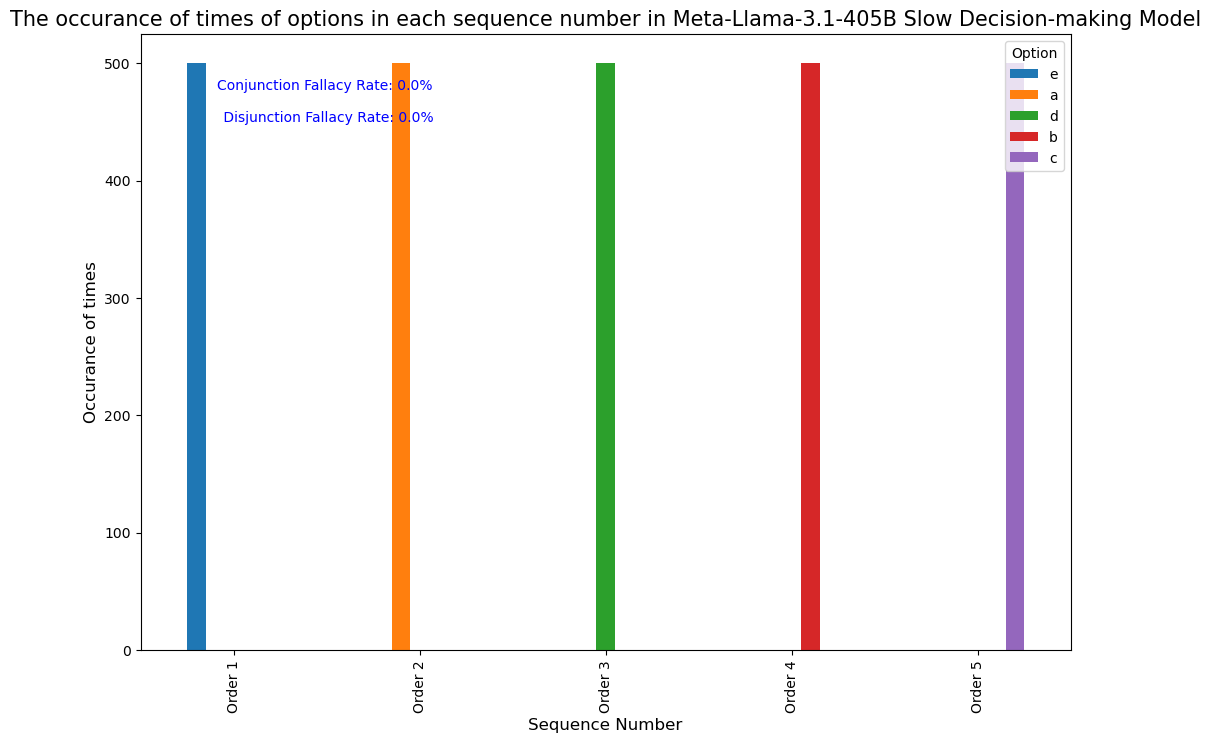

In [57]:
df1.plot(kind="bar", figsize=(12, 8))
plt.title("The occurance of times of options in each sequence number in Meta-Llama-3.1-405B Slow Decision-making Model",fontsize=15)
plt.xlabel("Sequence Number",fontsize=12)
plt.ylabel("Occurance of times",fontsize=12)
plt.legend(title="Option")
plt.text(0.5,450,"Conjunction Fallacy Rate: 0.0% \n\n Disjunction Fallacy Rate: 0.0%",ha="center",fontdict={"color":"blue"})
plt.show()

